In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Import Tables

In [10]:
# Read file
df_guest = pd.read_csv("guests.csv")
df_hotel = pd.read_csv("hotels.csv")
df_pref = pd.read_csv("preferences.csv")

# Hotel

In [11]:
df_hotel.head()

,hotel,rooms,price
0,hotel_1,13,273
1,hotel_2,18,92
2,hotel_3,12,141
3,hotel_4,18,157
4,hotel_5,7,298


In [12]:
df_hotel.price.min(), df_hotel.price.max()

(50, 299)

(array([44., 39., 26., 41., 34., 41., 51., 42., 35., 47.]),
 array([ 50. ,  74.9,  99.8, 124.7, 149.6, 174.5, 199.4, 224.3, 249.2,
        274.1, 299. ]),
 <BarContainer object of 10 artists>)

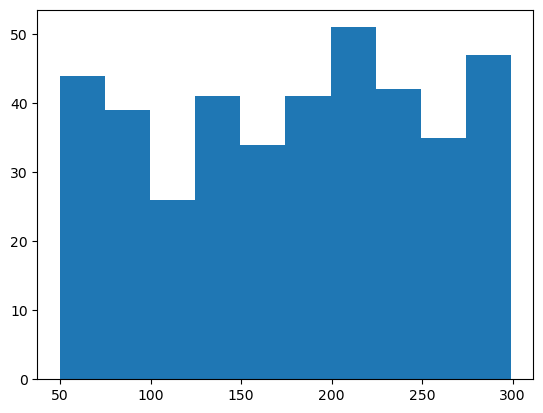

In [13]:
plt.hist(df_hotel.price)

In [14]:
quant_hotel = np.quantile(df_hotel.price, [0, 0.25, 0.75, 1])

In [15]:
quant_hotel

array([ 50.  , 116.75, 238.25, 299.  ])

In [22]:
df_hotel["cut_by_price"] = pd.cut(df_hotel.price, quant_hotel, include_lowest=True, labels=["c", "b", "a"])

In [23]:
df_hotel.head()

,hotel,rooms,price,cut_by_price
0,hotel_1,13,273,a
1,hotel_2,18,92,c
2,hotel_3,12,141,b
3,hotel_4,18,157,b
4,hotel_5,7,298,a


(array([100., 200., 100.]),
 array([ 50.  , 116.75, 238.25, 299.  ]),
 <BarContainer object of 3 artists>)

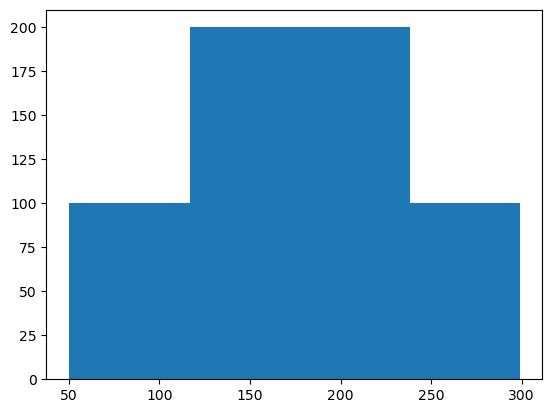

In [26]:
plt.hist(df_hotel.price, bins=quant_hotel)

In [27]:
df_hotel.pivot_table(index='cut_by_price', values='hotel', aggfunc='count')

,hotel
cut_by_price,
c,100
b,200
a,100


In [28]:
df_hotel.head()

,hotel,rooms,price,cut_by_price
0,hotel_1,13,273,a
1,hotel_2,18,92,c
2,hotel_3,12,141,b
3,hotel_4,18,157,b
4,hotel_5,7,298,a


In [29]:
df_hotel.pivot_table(index='cut_by_price', values="rooms", aggfunc='mean')

,rooms
cut_by_price,
c,11.71
b,11.61
a,11.24


In [30]:
df_pref = df_pref.merge(df_hotel, on='hotel')

In [31]:
df_pref.head()

,guest,hotel,priority,rooms,price,cut_by_price
0,guest_1,hotel_168,1,13,298,a
1,guest_16,hotel_168,3,13,298,a
2,guest_31,hotel_168,29,13,298,a
3,guest_51,hotel_168,3,13,298,a
4,guest_58,hotel_168,16,13,298,a


In [35]:
grouped = df_pref.groupby("guest", as_index=False)["hotel"].count()

In [36]:
grouped

,guest,hotel
0,guest_1,18
1,guest_10,27
2,guest_100,36
3,guest_1000,47
4,guest_1001,41
...,...,...
3995,guest_995,7
3996,guest_996,2
3997,guest_997,44
3998,guest_998,25


(array([427., 396., 431., 403., 306., 411., 402., 429., 386., 409.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <BarContainer object of 10 artists>)

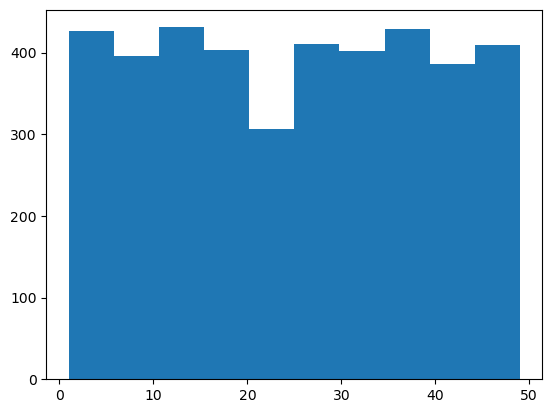

In [39]:
plt.hist(grouped.hotel)

In [37]:
quant_pref = np.quantile(grouped.hotel, [0, 0.25, 0.75, 1])

grouped["cut_by_pref"] = pd.cut(grouped.hotel, quant_pref, include_lowest=True, labels=["low", "medium", "high"])

(array([ 911., 2027., 1062.]),
 array([ 1., 12., 37., 49.]),
 <BarContainer object of 3 artists>)

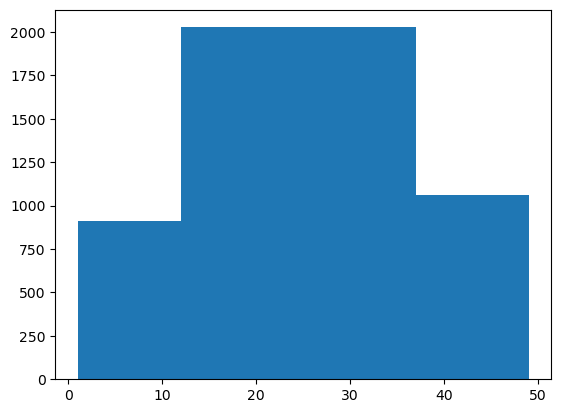

In [38]:
plt.hist(grouped.hotel, bins=quant_pref)

In [93]:
grouped

,guest,hotel,cut_by_pref
0,guest_1,18,medium
1,guest_10,27,medium
2,guest_100,36,medium
3,guest_1000,47,high
4,guest_1001,41,high
...,...,...,...
3995,guest_995,7,low
3996,guest_996,2,low
3997,guest_997,44,high
3998,guest_998,25,medium


In [40]:
df_pref = df_pref.merge(grouped[["guest", "cut_by_pref"]], on='guest')

In [41]:
df_pref.pivot_table(index='guest', aggfunc='count', values='hotel').describe()

,hotel
count,4000.000000
mean,24.883250
std,14.232859
min,1.000000
25%,12.000000
50%,25.000000
75%,37.000000
max,49.000000


In [42]:
df_pref.head()

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
0,guest_1,hotel_168,1,13,298,a,medium
1,guest_1,hotel_207,2,8,128,b,medium
2,guest_1,hotel_222,3,17,231,b,medium
3,guest_1,hotel_124,4,10,255,a,medium
4,guest_1,hotel_223,5,17,291,a,medium


In [49]:
df_pref.groupby('guest', as_index=False)['priority'].quantile([.25, .75, 1], 'lower').reset_index().drop(columns=["level_0"]).rename(columns={'level_1': "percentile", 'priority': 'priority_cutoff'})

,percentile,guest,priority_cutoff
0,0.25,guest_1,5
1,0.75,guest_1,13
2,1.00,guest_1,18
3,0.25,guest_10,7
4,0.75,guest_10,20
...,...,...,...
11995,0.75,guest_998,19
11996,1.00,guest_998,25
11997,0.25,guest_999,1
11998,0.75,guest_999,2


In [50]:
guest_percentile = df_pref.groupby('guest', as_index=False)['priority'].quantile([.25, .75, 1], 'lower').reset_index().drop(columns=["level_0"]).rename(columns={'level_1': "percentile", 'priority': 'priority_cutoff'})

In [52]:
df_pref[df_pref.guest=="guest_3671"]

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
99532,guest_3671,hotel_356,1,18,208,b,low


In [54]:
guest_percentile[guest_percentile.guest=="guest_3671"]

,guest,priority_cutoff,percentile
8705,guest_3671,1,0.25


In [53]:
guest_percentile = guest_percentile.groupby(["guest", "priority_cutoff"], as_index=False).min()

In [55]:
guest_percentile = guest_percentile.replace({"percentile": {0.25: "top", 0.75:"medium", 1:"low"}})

In [56]:
guest_percentile.head()

,guest,priority_cutoff,percentile
0,guest_1,5,top
1,guest_1,13,medium
2,guest_1,18,low
3,guest_10,7,top
4,guest_10,20,medium


In [57]:
guest_percentile.tail()

,guest,priority_cutoff,percentile
11743,guest_998,19,medium
11744,guest_998,25,low
11745,guest_999,1,top
11746,guest_999,2,medium
11747,guest_999,3,low


In [60]:
df_pref_2 = df_pref.merge(guest_percentile, on='guest')

In [59]:
guest_percentile.head()

,guest,priority_cutoff,percentile
0,guest_1,5,top
1,guest_1,13,medium
2,guest_1,18,low
3,guest_10,7,top
4,guest_10,20,medium


In [134]:
df_pref.head()

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
0,guest_1,hotel_168,1,13,298,a,medium
1,guest_1,hotel_207,2,8,128,b,medium
2,guest_1,hotel_222,3,17,231,b,medium
3,guest_1,hotel_124,4,10,255,a,medium
4,guest_1,hotel_223,5,17,291,a,medium


In [62]:
df_pref_2.head(20)

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref,priority_cutoff,percentile
0,guest_1,hotel_168,1,13,298,a,medium,5,top
1,guest_1,hotel_168,1,13,298,a,medium,13,medium
2,guest_1,hotel_168,1,13,298,a,medium,18,low
3,guest_1,hotel_207,2,8,128,b,medium,5,top
4,guest_1,hotel_207,2,8,128,b,medium,13,medium
5,guest_1,hotel_207,2,8,128,b,medium,18,low
6,guest_1,hotel_222,3,17,231,b,medium,5,top
7,guest_1,hotel_222,3,17,231,b,medium,13,medium
8,guest_1,hotel_222,3,17,231,b,medium,18,low
9,guest_1,hotel_124,4,10,255,a,medium,5,top


In [63]:
df_pref_2 = df_pref_2[df_pref_2.priority <= df_pref_2.priority_cutoff]

In [67]:
df_pref_2.head(20)

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref,priority_cutoff,percentile
0,guest_1,hotel_168,1,13,298,a,medium,5,top
1,guest_1,hotel_168,1,13,298,a,medium,13,medium
2,guest_1,hotel_168,1,13,298,a,medium,18,low
3,guest_1,hotel_207,2,8,128,b,medium,5,top
4,guest_1,hotel_207,2,8,128,b,medium,13,medium
5,guest_1,hotel_207,2,8,128,b,medium,18,low
6,guest_1,hotel_222,3,17,231,b,medium,5,top
7,guest_1,hotel_222,3,17,231,b,medium,13,medium
8,guest_1,hotel_222,3,17,231,b,medium,18,low
9,guest_1,hotel_124,4,10,255,a,medium,5,top


In [66]:
df_pref_2 = df_pref_2.sort_values(by=['guest', 'priority', 'priority_cutoff'])

In [68]:
df_pref_3 = df_pref_2.drop_duplicates(subset=['guest', 'priority'], keep='first')

In [70]:
df_pref_3.head(20)

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref,priority_cutoff,percentile
0,guest_1,hotel_168,1,13,298,a,medium,5,top
3,guest_1,hotel_207,2,8,128,b,medium,5,top
6,guest_1,hotel_222,3,17,231,b,medium,5,top
9,guest_1,hotel_124,4,10,255,a,medium,5,top
12,guest_1,hotel_223,5,17,291,a,medium,5,top
16,guest_1,hotel_297,6,10,261,a,medium,13,medium
19,guest_1,hotel_129,7,19,85,c,medium,13,medium
25,guest_1,hotel_12,8,18,224,b,medium,13,medium
28,guest_1,hotel_1,9,13,273,a,medium,13,medium
22,guest_1,hotel_129,10,19,85,c,medium,13,medium


In [71]:
len(df_pref_3.guest.unique())

4000

In [72]:
len(df_pref_3)

99533

In [74]:
len(df_pref)

99533

In [155]:
df_pref_3.pivot_table(index=['percentile'], columns='cut_by_price', values='hotel', aggfunc='count')

cut_by_price,c,b,a
percentile,,,
low,6345,12620,6344
medium,11974,23809,12016
top,6570,13222,6633


In [75]:
df_pref.head()

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
0,guest_1,hotel_168,1,13,298,a,medium
1,guest_1,hotel_207,2,8,128,b,medium
2,guest_1,hotel_222,3,17,231,b,medium
3,guest_1,hotel_124,4,10,255,a,medium
4,guest_1,hotel_223,5,17,291,a,medium


In [80]:
df_pref.groupby("hotel", as_index=False)['priority'].count().sort_values('priority', ascending=False)

,hotel,priority
153,hotel_237,298
197,hotel_277,296
95,hotel_185,284
307,hotel_376,283
41,hotel_136,280
...,...,...
227,hotel_303,215
96,hotel_186,209
126,hotel_212,205
328,hotel_395,204


In [83]:
df_pref_3.pivot_table(index="hotel", columns='percentile', aggfunc='count', values='guest').sort_values(by=["top"], ascending=False)

percentile,low,medium,top
hotel,,,
hotel_277,56,148,92
hotel_393,56,124,87
hotel_75,76,113,84
hotel_298,61,118,83
hotel_196,53,108,83
...,...,...,...
hotel_364,72,134,48
hotel_201,68,124,47
hotel_395,59,99,46


In [84]:
df_pref

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
0,guest_1,hotel_168,1,13,298,a,medium
1,guest_1,hotel_207,2,8,128,b,medium
2,guest_1,hotel_222,3,17,231,b,medium
3,guest_1,hotel_124,4,10,255,a,medium
4,guest_1,hotel_223,5,17,291,a,medium
...,...,...,...,...,...,...,...
99528,guest_3925,hotel_356,2,18,208,b,low
99529,guest_1197,hotel_61,1,7,157,b,low
99530,guest_561,hotel_71,1,14,175,b,low
99531,guest_3593,hotel_71,1,14,175,b,low


In [89]:
df_hotel.rooms.sum()

4617

In [90]:
len(df_guest)

4000